In [1]:
import os
import chemprop
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
from scipy.stats.stats import pearsonr
import shap
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

E:\Anaconda\envs\ML\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('../data/1586_morgan_2048.csv')
df

,Unnamed: 0,PCE_max(%),Jsc(mA/cm2),FF,Voc(V),Donor_0,Donor_1,Donor_2,Donor_3,Donor_4,...,Acceptor2038,Acceptor2039,Acceptor2040,Acceptor2041,Acceptor2042,Acceptor2043,Acceptor2044,Acceptor2045,Acceptor2046,Acceptor2047
0,0,6.93,16.35,0.500,0.865,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3.09,10.31,0.380,0.794,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,8.33,15.28,0.690,0.790,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,8.67,14.00,0.579,1.070,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,8.46,13.95,0.601,1.010,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,1581,18.16,25.43,0.765,0.934,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1582,1582,10.70,23.51,0.598,0.761,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1583,1583,17.31,26.32,0.728,0.903,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1584,1584,17.81,26.35,0.778,0.869,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = df.iloc[:, 5:4101]
Y = df.iloc[:,1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
Y

0        6.93
1        3.09
2        8.33
3        8.67
4        8.46
        ...  
1581    18.16
1582    10.70
1583    17.31
1584    17.81
1585    18.77
Name: PCE_max(%), Length: 1586, dtype: float64

In [4]:
def R2Score(X,Y):
    r2=metrics.r2_score(X,Y)
    return r2
def PearsonCoefficient(X, Y):
    corr, _ = pearsonr(X,Y)
    return corr

In [5]:
import pickle
with open('../model/rf_Morgan_2048.pkl', 'rb') as f:
    regressor = pickle.load(f)

In [6]:
regressor.fit(X_train, y_train)
y_train_hat = regressor.predict(X_train)
y_test_hat = regressor.predict(X_test)


In [7]:
#np.savetxt('y_train_Morgan_2048.csv', y_train)
#np.savetxt('y_test_Morgan_2048.csv', y_test)
#np.savetxt('y_train_hat_Morgan_2048.csv', y_train_hat)
#np.savetxt('y_test_hat_Morgan_2048.csv', y_test_hat)

In [8]:
model=regressor

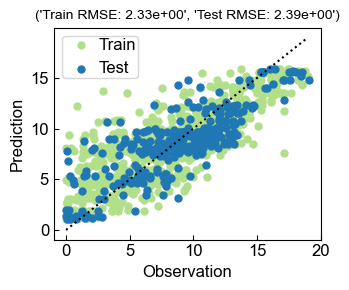

In [9]:
fontsize = 12
plt.figure(figsize=(3.5,3))
plt.style.use('default')
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rcParams['font.family']="Arial"
a = plt.scatter(y_train, y_train_hat, s=25,c='#b2df8a')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k:', lw=1.5)
plt.xlabel('Observation', fontsize=fontsize)
plt.ylabel('Prediction', fontsize=fontsize)
#plt.xticks([0, 0.6, 1.2, 1.8])
# plt.yticks([0, 0.6, 1.2, 1.8])
plt.tick_params(direction='in')
#plt.text(450,80,'Scaled',family="Arial",fontsize=fontsize)
#plt.xlim([0,2]) 
#plt.ylim([0,2])
plt.title(('Train RMSE: {:.2e}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_hat))),\
               'Test RMSE: {:.2e}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_hat)))), fontsize=10)
b = plt.scatter(y_test, y_test_hat, s=25,c='#1f78b4')
plt.legend((a,b),('Train','Test'),fontsize=fontsize,handletextpad=0.1,borderpad=0.1)
plt.rcParams['font.family']="Arial"
plt.tight_layout()
plt.savefig('../result/Morgan_2048_RF.jpg', dpi = 2048)
#plt.savefig('20191213_RF_withPTEAI_1.png', dpi = 1200)
plt.show()

In [10]:
PearsonCoefficient(y_test,y_test_hat)

0.8158691676472134

In [11]:
R2Score(y_test,y_test_hat)

0.6626867058960876

In [12]:
explainer = shap.TreeExplainer(model)
shap_explainer = explainer(X)
shap_values = explainer.shap_values(X)
shap_explainer.data=shap_explainer.data[0]
shap_explainer.values=shap_explainer.values[0]

In [13]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 36 
plt.rcParams['figure.figsize'] = [4,6]
plt.rcParams['figure.dpi']= 300
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'

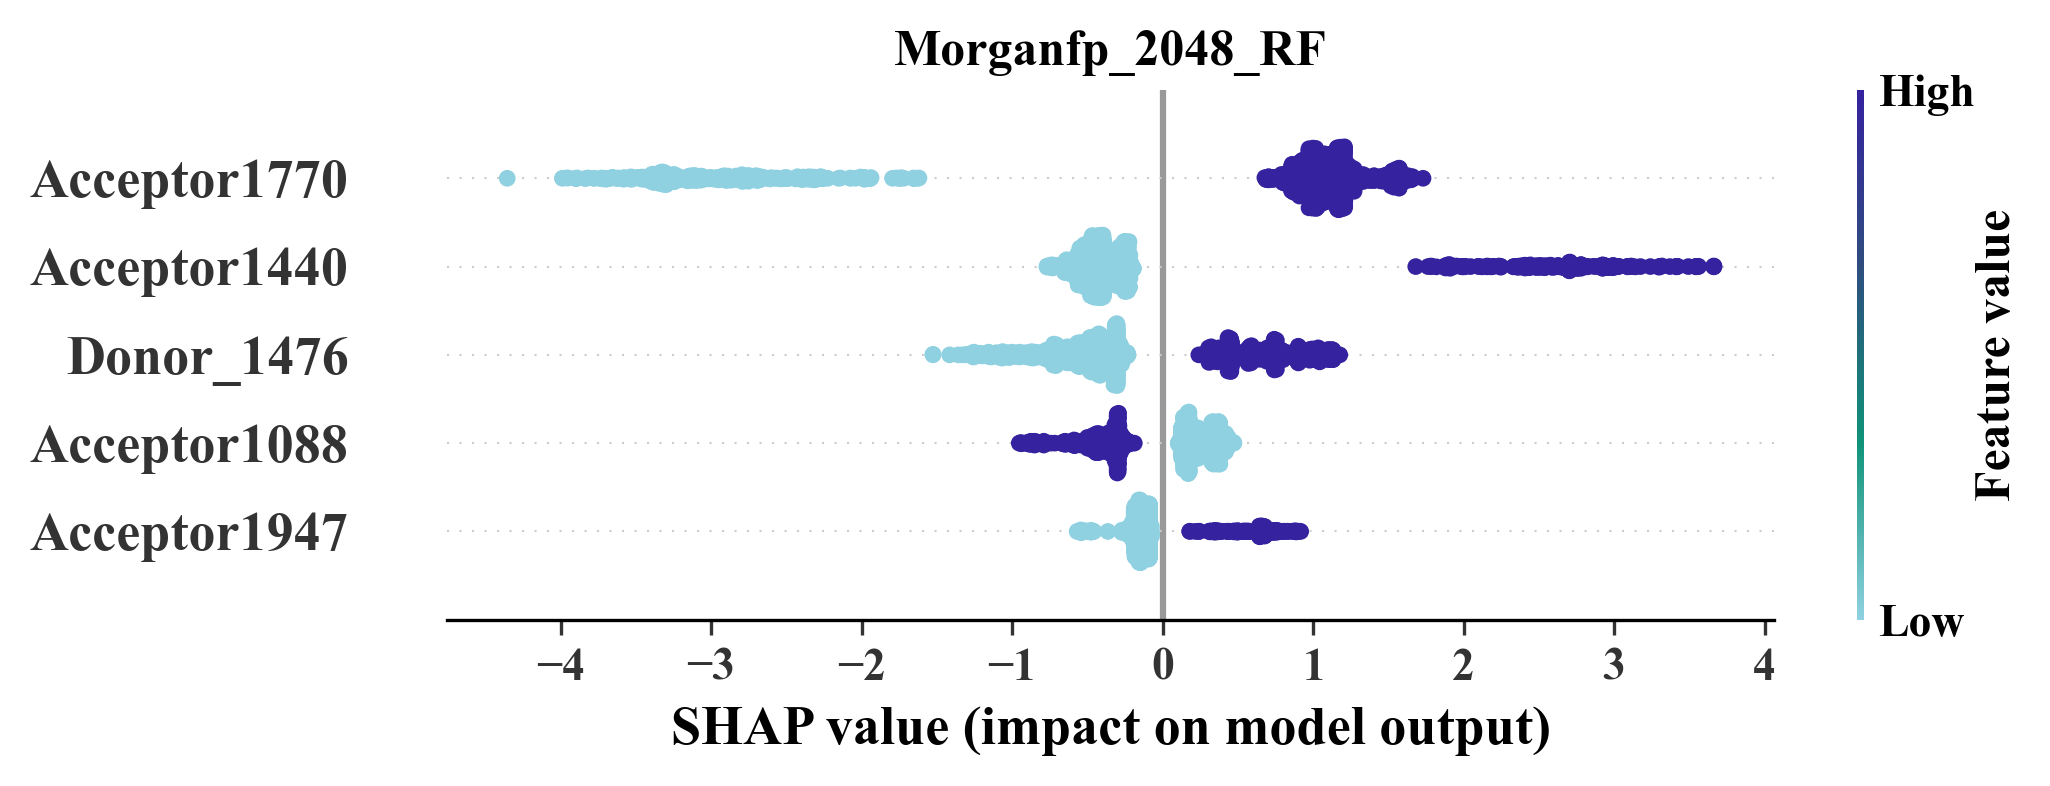

In [14]:
shap.initjs()

color01 = (143,209,225)
color02 = (15,147,121)
color03 = (46,78,126)
color04 = (53,34,159)


colors = [tuple([x / 255 for x in color]) for color in [color01, color02, color03, color04]]


gradient_colors = [colors[0], colors[1], colors[2], colors[3]]



n = 256
newcolors = []
for color in gradient_colors:
    rgba_color = cm.colors.to_rgba(color)
    newcolors.append(rgba_color)

newcmp = cm.colors.LinearSegmentedColormap.from_list('BlueYellow', newcolors, N=n)


plt.figure()

shap.summary_plot(shap_values, X, max_display=5, show=False)
for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(newcmp)

plt.title(('Morganfp_2048_RF'), fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('../SHAP/SHAP_Morganfp_2048_RF_1.tif',dpi = 300)


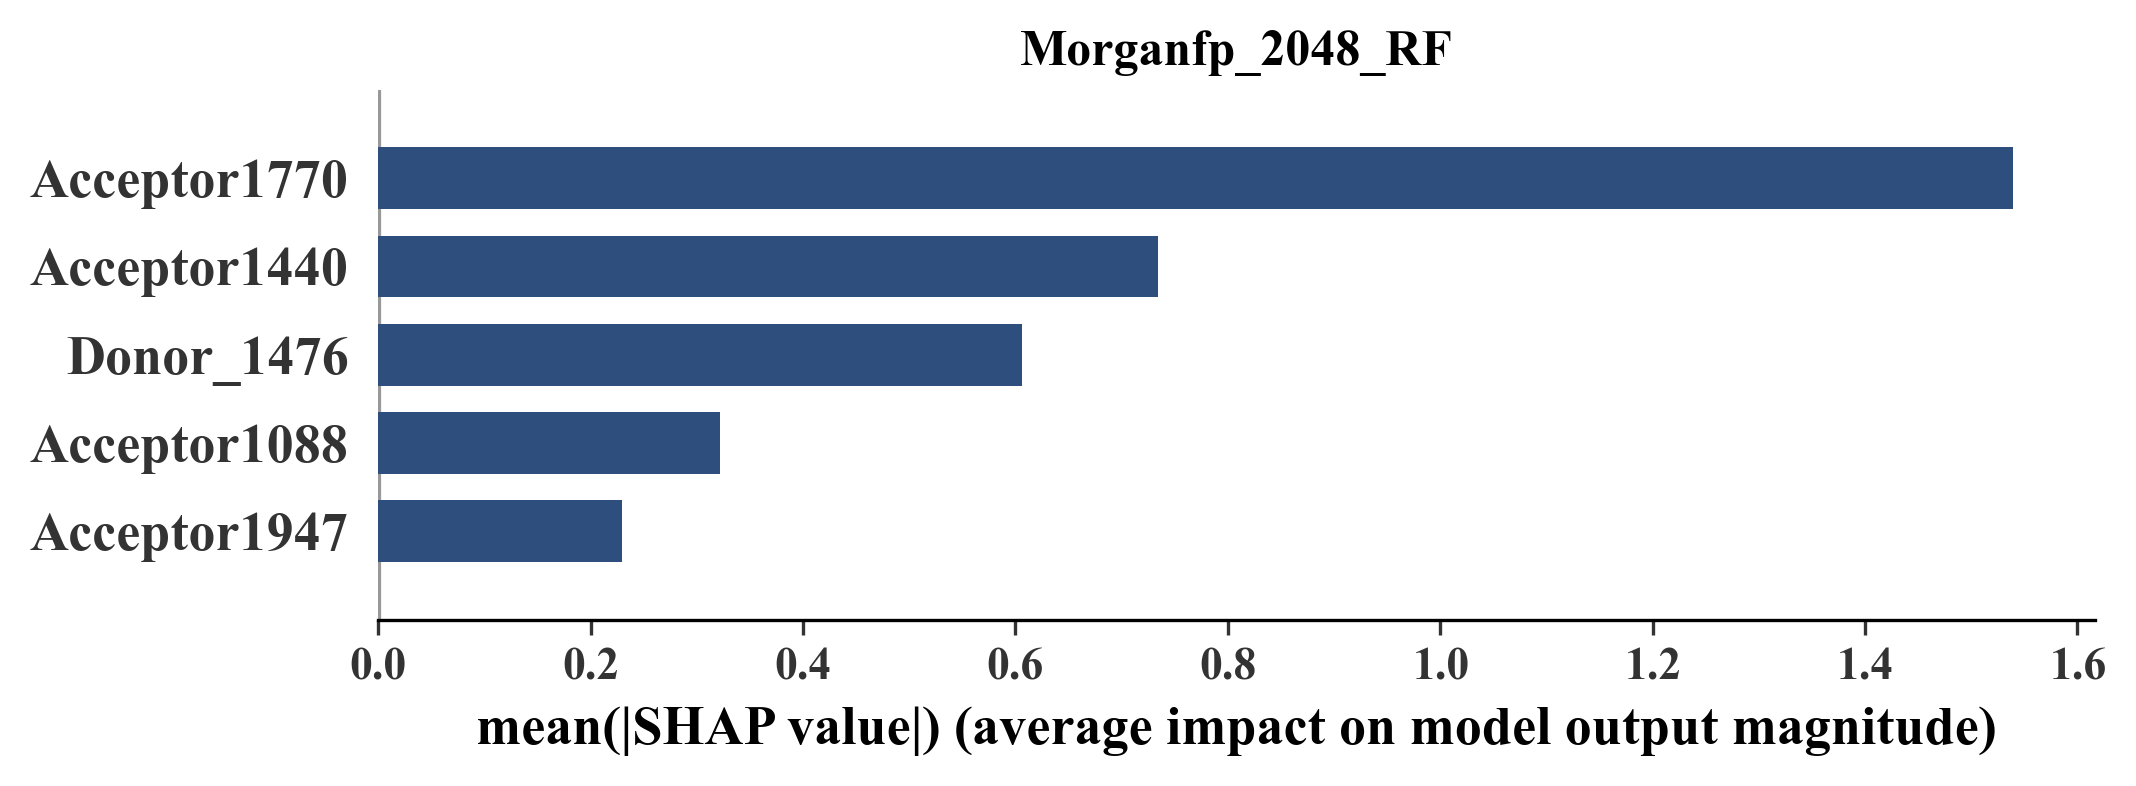

In [15]:
shap.summary_plot(shap_values,X, plot_type="bar",show=False,color="#2e4e7e",max_display=5)


plt.title(('Morganfp_2048_RF'), fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('../SHAP/SHAP_Morganfp_2048_RF_2.tif',dpi = 300)